In [1]:
%matplotlib widget

In [2]:
#%matplotlib notebook
import umap.umap_ as umap
import glob
import os
import tmd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cd /Users/kanari/BBP/Projects/MMB/Yann2/Results_09_2024/

/Users/kanari/BBP/Projects/MMB/Yann2/Results_09_2024


/Users/kanari/BBP/Code/venvNeuroTS/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
ph_bbp_dend = np.load('/Users/kanari/BBP/Projects/MMB/Data/RES/Strict/BBP_all_path/ph_dend_all.npy', allow_pickle=True).tolist()
ph_bbp_dend = np.load('/Users/kanari/BBP/Projects/MMB/Data/RES/Strict/BBP_all_path/ph_dend_all.npy', allow_pickle=True).tolist()
ph_bbp_bas = np.load('/Users/kanari/BBP/Projects/MMB/Data/RES/Strict/BBP_all_path/ph_bas_all.npy', allow_pickle=True).tolist()
ph_bbp_ap = np.load('/Users/kanari/BBP/Projects/MMB/Data/RES/Strict/BBP_all_path/ph_ap_all.npy', allow_pickle=True).tolist()
ph_bbp_axon = np.load('/Users/kanari/BBP/Projects/MMB/Data/RES/Strict/BBP_all_path/ph_axon_all.npy', allow_pickle=True).tolist()
names_bbp = np.load('/Users/kanari/BBP/Projects/MMB/Data/RES/Strict/BBP_all_path/names_all.npy', allow_pickle=True).tolist()
names_gw = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/GW_2024/names_all.npy', allow_pickle=True).tolist()
names_gw = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/GW_2024/names_all.npy', allow_pickle=True).tolist()
ph_gw_dend = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/GW_2024/names_dend_all.npy', allow_pickle=True).tolist()
ph_gw_bas = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/GW_2024/names_bas_all.npy', allow_pickle=True).tolist()
ph_gw_ap = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/GW_2024/names_ap_all.npy', allow_pickle=True).tolist()
ph_gw_axon = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/GW_2024/names_ax_all.npy', allow_pickle=True).tolist()

names_gw = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/GW_2024/names_all.npy', allow_pickle=True).tolist()
names_sc = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/SC_2024/names_all.npy', allow_pickle=True).tolist()
ph_sc_dend = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/SC_2024/names_dend_all.npy', allow_pickle=True).tolist()
ph_sc_bas = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/SC_2024/names_bas_all.npy', allow_pickle=True).tolist()
ph_sc_ap = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/SC_2024/names_ap_all.npy', allow_pickle=True).tolist()
ph_sc_axon = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/SC_2024/names_ax_all.npy', allow_pickle=True).tolist()

names_sc = np.load('/Users/kanari/BBP/Projects/MMB/Data/Results/SC_2024/names_all.npy', allow_pickle=True).tolist()

In [5]:
def slice_diagram_in_two(ph, threshold=4000):
    p_local = []
    p_long = []
    for p in ph:
        if p[0] <= threshold and p[1] <= threshold:
            p_local.append(p)
        else:
            p_long.append(p)
    return(p_local, p_long)


def get_ph_axon_loc_long(ph_axons, thresh=5000):
    """Separates local, long range axons"""
    ph_local = []
    ph_long = []
    for p in ph_axons:
        p0, p1 = slice_diagram_in_two(p, thresh)
        ph_local.append(p0)
        ph_long.append(p1)
    return ph_local, ph_long
def get_all_entropies(ph_bas, ph_ap, ph_ax, bins_bas, bins_ap, bins_ax_loc, bins_ax_long, thresh=5000):

    ph_local, ph_long = get_ph_axon_loc_long(ph_ax, thresh)

    entropy_dend = [tmd.vectorizations.life_entropy_curve(pa, bins=bins_ap)[0] +
                    tmd.vectorizations.life_entropy_curve(pb, bins=bins_bas)[0]
                    for pa, pb in zip(ph_ap, ph_bas)]

    
    entropy_axon = [tmd.vectorizations.life_entropy_curve(p_loc, bins=bins_ax_loc)[0] #+
                    #tmd.vectorizations.life_entropy_curve(p_long, bins=bins_ax_long)[0]
                    for p_loc, p_long in zip(ph_local, ph_long)]

    return entropy_dend, entropy_axon

In [6]:
entropies_bbp = get_all_entropies(ph_bbp_bas, ph_bbp_ap, ph_bbp_axon, np.linspace(0, 800, 100), np.linspace(0, 1600, 100), np.linspace(0, 4000, 100), np.linspace(4000, 10000, 100), thresh=4000)
entropies_gw = get_all_entropies(ph_gw_bas, ph_gw_ap, ph_gw_axon, np.linspace(0, 800, 100), np.linspace(0, 1600, 100), np.linspace(0, 4000, 100), np.linspace(4000, 10000, 100), thresh=4000)
entropies_sc = get_all_entropies(ph_sc_bas, ph_sc_ap, ph_sc_axon, np.linspace(0, 800, 100), np.linspace(0, 1600, 100), np.linspace(0, 4000, 100), np.linspace(4000, 10000, 100), thresh=4000)

entr_dend, entr_ax = get_all_entropies(ph_bbp_bas + ph_gw_bas + ph_sc_bas,
                                       ph_bbp_ap + ph_gw_ap + ph_sc_ap,
                                       ph_bbp_axon + ph_gw_axon + ph_sc_axon,
                                       np.linspace(0, 800, 100), np.linspace(0, 1600, 100), 
                                       np.linspace(0, 4000, 100), np.linspace(4000, 10000, 100), 
                                       thresh=4000)


In [7]:
print("BBP:", len(entropies_bbp[0]), "GW:", len(entropies_gw[0]), "SC:", len(entropies_sc[0]), "All:", len(entr_dend), len(entr_ax))

BBP: 1011 GW: 529 SC: 380 All: 1920 1920


In [8]:
reducer = umap.UMAP(n_components=3, random_state=42)
trainHA = reducer.fit(entropies_bbp[1])
em_sc = trainHA.transform(entropies_sc[1])
em_gw = trainHA.transform(entropies_sc[1])

/Users/kanari/BBP/Code/venvNeuroTS/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [9]:
np.savez('BBP_axon_embedding.npz', trainHA.embedding_)
np.savez('Gouwens_axon_embedding.npz', em_gw)
np.savez('Scala_axon_embedding.npz', em_sc)

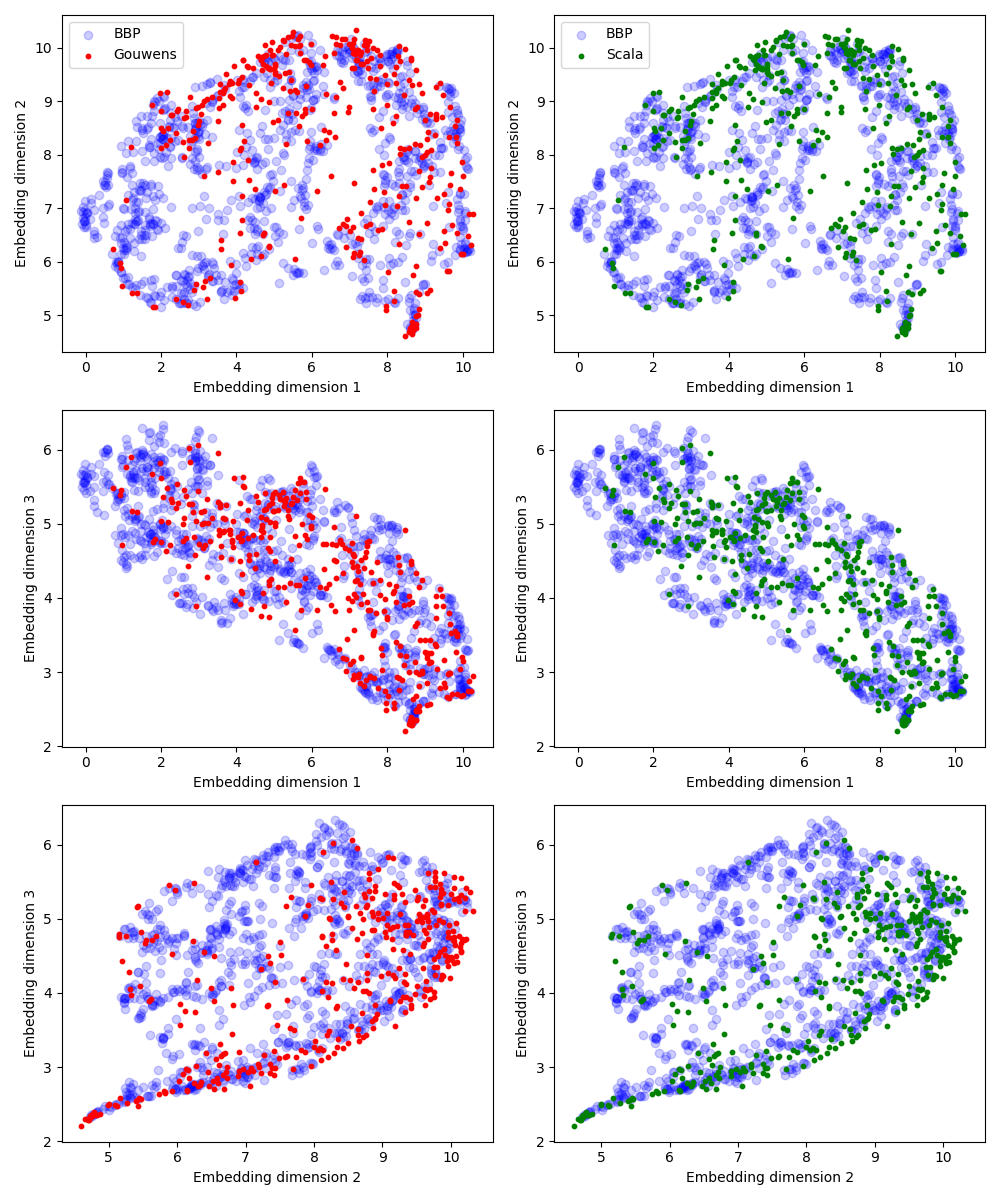

In [10]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(321)
ax.scatter(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 1],color='b', alpha=0.2, label='BBP')
ax.scatter(
    em_gw[:, 0],
    em_gw[:, 1],
    color='r', s=10, label='Gouwens')
ax.set_xlabel('Embedding dimension 1')
ax.set_ylabel('Embedding dimension 2')
plt.legend()

ax = fig.add_subplot(322)
ax.scatter(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 1],color='b', alpha=0.2, label='BBP')
ax.scatter(
    em_sc[:, 0],
    em_sc[:, 1],
    color='green', s=10, label='Scala')
ax.set_xlabel('Embedding dimension 1')
ax.set_ylabel('Embedding dimension 2')
plt.legend()

ax = fig.add_subplot(323)
ax.scatter(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 2],color='b', alpha=0.2)
ax.scatter(
    em_gw[:, 0],
    em_gw[:, 2],
    color='r', s=10)
ax.set_xlabel('Embedding dimension 1')
ax.set_ylabel('Embedding dimension 3')
ax = fig.add_subplot(324)
ax.scatter(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 2],color='b', alpha=0.2)
ax.scatter(
    em_sc[:, 0],
    em_sc[:, 2],
    color='green', s=10)
ax.set_xlabel('Embedding dimension 1')
ax.set_ylabel('Embedding dimension 3')

ax = fig.add_subplot(325)
ax.scatter(
    trainHA.embedding_[:, 1],
    trainHA.embedding_[:, 2],color='b', alpha=0.2)
ax.scatter(
    em_gw[:, 1],
    em_gw[:, 2],
    color='r', s=10)
ax.set_xlabel('Embedding dimension 2')
ax.set_ylabel('Embedding dimension 3')
ax = fig.add_subplot(326)
ax.scatter(
    trainHA.embedding_[:, 1],
    trainHA.embedding_[:, 2],color='b', alpha=0.2)
ax.scatter(
    em_sc[:, 1],
    em_sc[:, 2],
    color='green', s=10)
ax.set_xlabel('Embedding dimension 2')
ax.set_ylabel('Embedding dimension 3')

plt.tight_layout()

plt.savefig('Axon_embedding.png')
plt.savefig('Axon_embedding.pdf')
plt.savefig('Axon_embedding.svg')

In [11]:
reducer = umap.UMAP(n_components=3, random_state=42)
trainHA = reducer.fit(entropies_bbp[0])
em_sc = trainHA.transform(entropies_sc[0])
em_gw = trainHA.transform(entropies_sc[0])

/Users/kanari/BBP/Code/venvNeuroTS/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
np.savez('BBP_dendrites_embedding.npz', trainHA.embedding_)
np.savez('Gouwens_dendrites_embedding.npz', em_gw)
np.savez('Scala_dendrites_embedding.npz', em_sc)

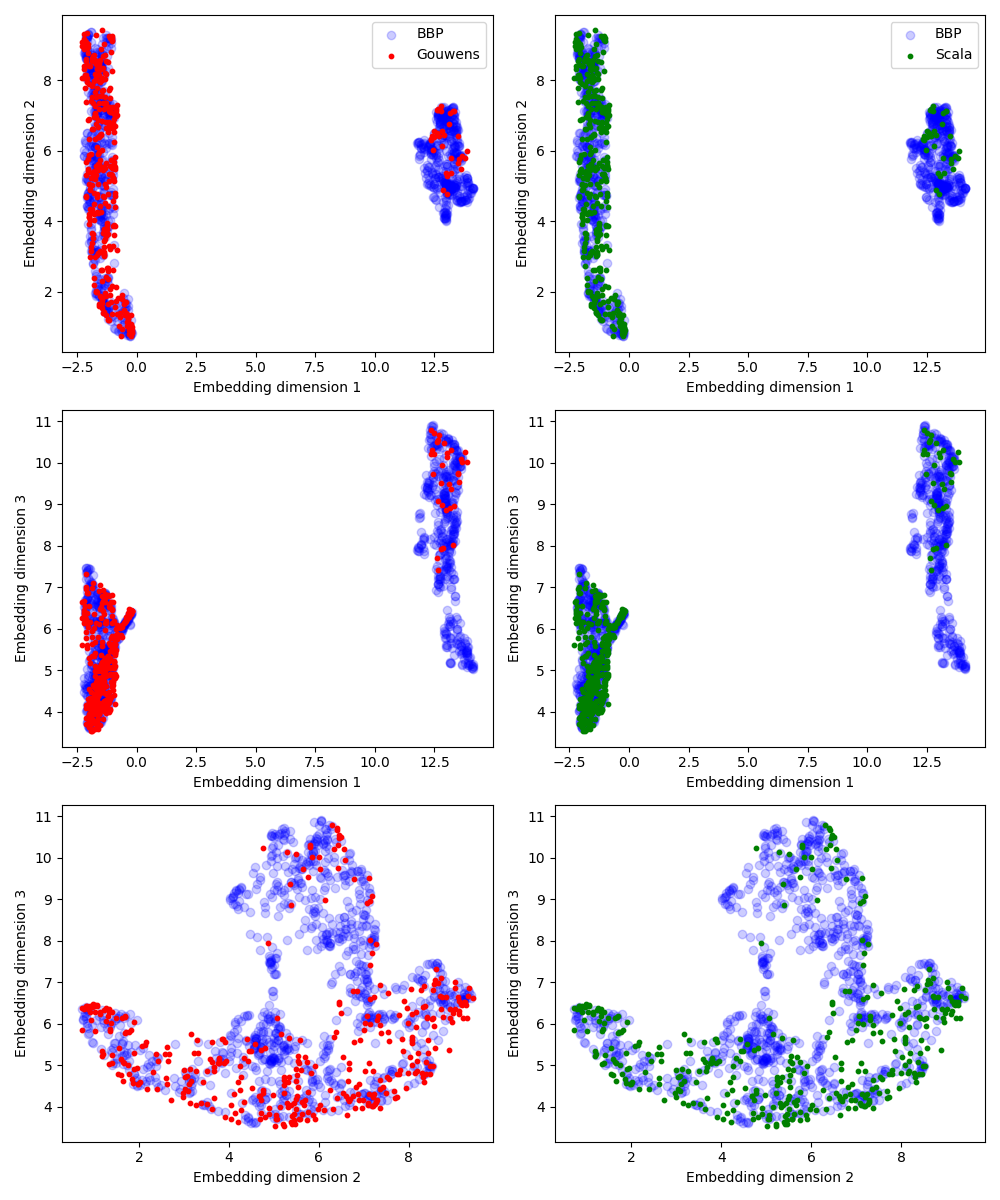

In [13]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(321)
ax.scatter(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 1],color='b', alpha=0.2, label='BBP')
ax.scatter(
    em_gw[:, 0],
    em_gw[:, 1],
    color='r', s=10, label='Gouwens')
ax.set_xlabel('Embedding dimension 1')
ax.set_ylabel('Embedding dimension 2')
plt.legend()

ax = fig.add_subplot(322)
ax.scatter(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 1],color='b', alpha=0.2, label='BBP')
ax.scatter(
    em_sc[:, 0],
    em_sc[:, 1],
    color='green', s=10, label='Scala')
ax.set_xlabel('Embedding dimension 1')
ax.set_ylabel('Embedding dimension 2')
plt.legend()

ax = fig.add_subplot(323)
ax.scatter(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 2],color='b', alpha=0.2)
ax.scatter(
    em_gw[:, 0],
    em_gw[:, 2],
    color='r', s=10)
ax.set_xlabel('Embedding dimension 1')
ax.set_ylabel('Embedding dimension 3')
ax = fig.add_subplot(324)
ax.scatter(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 2],color='b', alpha=0.2)
ax.scatter(
    em_sc[:, 0],
    em_sc[:, 2],
    color='green', s=10)
ax.set_xlabel('Embedding dimension 1')
ax.set_ylabel('Embedding dimension 3')

ax = fig.add_subplot(325)
ax.scatter(
    trainHA.embedding_[:, 1],
    trainHA.embedding_[:, 2],color='b', alpha=0.2)
ax.scatter(
    em_gw[:, 1],
    em_gw[:, 2],
    color='r', s=10)
ax.set_xlabel('Embedding dimension 2')
ax.set_ylabel('Embedding dimension 3')
ax = fig.add_subplot(326)
ax.scatter(
    trainHA.embedding_[:, 1],
    trainHA.embedding_[:, 2],color='b', alpha=0.2)
ax.scatter(
    em_sc[:, 1],
    em_sc[:, 2],
    color='green', s=10)
ax.set_xlabel('Embedding dimension 2')
ax.set_ylabel('Embedding dimension 3')

plt.tight_layout()

plt.savefig('Dendrites_embedding.png')
plt.savefig('Dendrites_embedding.pdf')
plt.savefig('Dendrites_embedding.svg')

In [14]:
def group_exc_inh(entr):
    if sum(entr[:100]) > 0:
        return 0
    else:
        return 1

def recursive_clustering(data_dendrites, data_axons, algo, H_levels=2, H_classes=[2,10]):
    groups = np.zeros([len(data_dendrites), 3])
    #group0 = algo(n_clusters=H_classes[0], random_state=2023).fit(data)
    group0 = np.array([group_exc_inh(e) for e in data_dendrites])
    
    class1 = np.where(group0 == 0)
    class2 = np.where(group0 == 1)

    data_dend1 = np.array(data_dendrites)[class1]
    data_dend2 = np.array(data_dendrites)[class2]

    group_d1 = algo(n_clusters=H_classes[1], random_state=2023).fit(data_dend1)
    group_d2 = algo(n_clusters=H_classes[1], random_state=2023).fit(data_dend2)

    data_axon1 = np.array(data_axons)[class1]
    data_axon2 = np.array(data_axons)[class2]

    group_a1 = algo(n_clusters=H_classes[1], random_state=2023).fit(data_axon1)
    group_a2 = algo(n_clusters=H_classes[1], random_state=2023).fit(data_axon2)

    groupa = np.zeros(len(data_dendrites))
    groupd = np.zeros(len(data_dendrites))

    groupd[class1] = group_d1.labels_
    groupd[class2] = group_d2.labels_
    groupa[class1] = group_a1.labels_
    groupa[class2] = group_a2.labels_

    for i in np.arange(len(data_dendrites)):
        groups[i] = [group0[i], groupd[i], groupa[i]]

    return groups

In [15]:
classification = recursive_clustering(entr_dend, entr_ax, KMeans)


In [16]:
classification


array([[0., 5., 3.],
       [0., 8., 3.],
       [0., 8., 0.],
       ...,
       [0., 8., 8.],
       [0., 8., 8.],
       [0., 2., 4.]])

In [17]:
clusters = classification[len(ph_bbp_ap):]

In [18]:
results_gw_sc = []
for n, c in zip(names_gw + names_sc, clusters):
    results_gw_sc.append([n.split('/')[-1]] + c.tolist())


In [19]:
import csv
with open('test_cluster.csv', 'w') as F:
    r = csv.writer(F)
    for d in results_gw_sc:
        r.writerow(d)


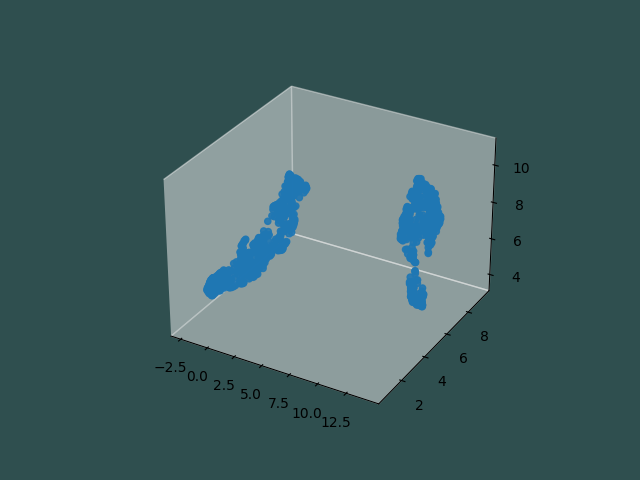

In [20]:
fig = plt.figure()
ax = plt.axes(projection="3d")
fig.set_facecolor("darkslategrey")
ax.set_facecolor("darkslategrey")
ax.grid(False)
#ax.w_xaxis.pane.fill = False
#ax.w_yaxis.pane.fill = False
#ax.w_zaxis.pane.fill = False

ax.scatter3D(
    trainHA.embedding_[:, 0],
    trainHA.embedding_[:, 1],
    trainHA.embedding_[:, 2],
    alpha=0.9, 
    #color=['b'] * len(ph_unnorm_d) + ['g']*len(ph_unnorm_g),
)

plt.show()
